In [1]:
import numpy as np
import matplotlib.pyplot as plt
from generator import Generator
import math
from collections import defaultdict
from itertools import permutations

In [2]:
gen = Generator(12345)

In [3]:
num_of_samples = 1000
num_processes = 10

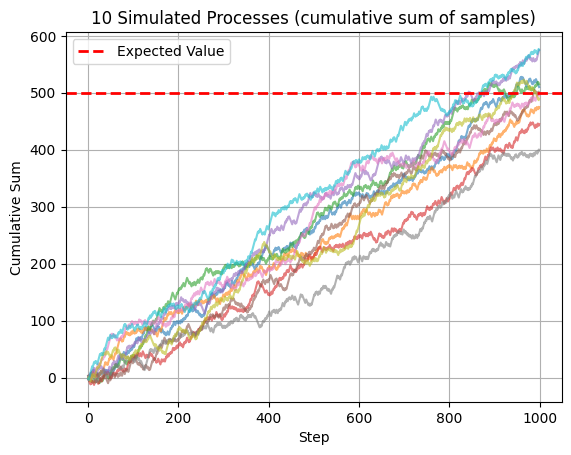

In [4]:
for _ in range(num_processes):
    samples = np.array(gen.choices((3, -2), (.5, .5), k = num_of_samples))
    process = samples.cumsum()
    plt.plot(process, alpha=.6)

exp_process = num_of_samples * 0.5
plt.axhline(y=exp_process, color='red', linestyle='--', linewidth=2, label='Expected Value')

plt.title(f"{num_processes} Simulated Processes (cumulative sum of samples)")
plt.grid(True)
plt.legend()
plt.xlabel("Step")
plt.ylabel("Cumulative Sum")
plt.show()

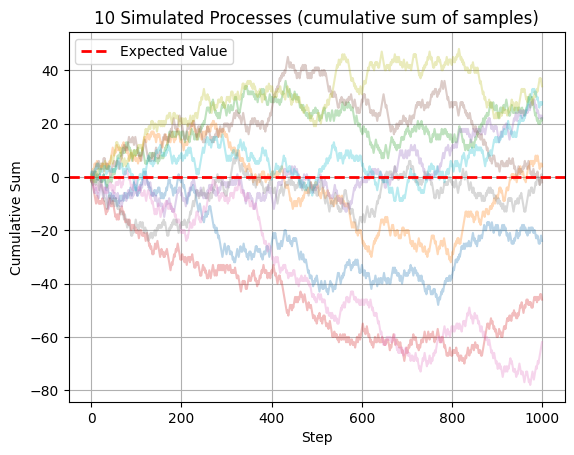

In [5]:
for _ in range(num_processes):
    samples = np.array(gen.choices((1, -1), (.5, .5), k = num_of_samples))
    process = samples.cumsum()
    plt.plot(process, alpha=.3)

exp_process = 0
plt.axhline(y=exp_process, color='red', linestyle='--', linewidth=2, label='Expected Value')

plt.title(f"{num_processes} Simulated Processes (cumulative sum of samples)")
plt.grid(True)
plt.legend()
plt.xlabel("Step")
plt.ylabel("Cumulative Sum")
plt.show()

## Assistant Hiring Problem Simulation
...

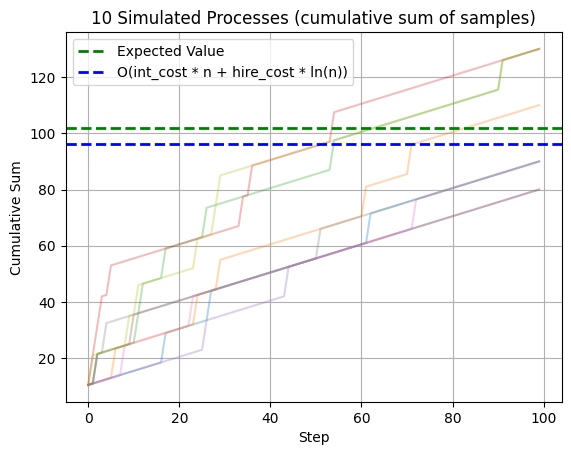

In [6]:
num_of_samples = 100
num_of_processes = 1000
interview_cost = .5
cost_of_hiring = 10

for _ in range(1, num_processes):
    samples = []
    for i in range(1, num_of_samples + 1):
        samples.append(gen.choices((cost_of_hiring, 0), (1/i, 1-(1/i)))[0] + interview_cost)
    samples = np.array(samples)
    process = samples.cumsum()
    plt.plot(process, alpha=.3)

exp_process = sum([1/i*cost_of_hiring for i in range(1, num_of_samples + 1)]) + num_of_samples * interview_cost
avg_costs = interview_cost * num_of_samples + cost_of_hiring * math.log(num_of_samples)
# worst_costs = interview_cost * num_of_samples + cost_of_hiring * num_of_samples

plt.axhline(y=exp_process, color='green', linestyle='--', linewidth=2, label='Expected Value')
plt.axhline(y=avg_costs, color='blue', linestyle='--', linewidth=2, label='O(int_cost * n + hire_cost * ln(n))')
# plt.axhline(y=worst_costs, color='red', linestyle='--', linewidth=2, label='O(int_cost * n + hire_cost * n)')

plt.title(f"{num_processes} Simulated Processes (cumulative sum of samples)")
plt.grid(True)
plt.legend()
plt.xlabel("Step")
plt.ylabel("Cumulative Sum")
plt.show()

## Price Picking ...

## Permute By Sorting
...

In [7]:
def permute_by_sorting(a):
    n = len(a)
    p = [gen.next_double_from_to(end=n ** 3) for _ in range(n)]
    paired = list(zip(p, a))
    paired.sort(key=lambda x: x[0])
    return tuple(item for _,item in paired)

In [8]:
def permute_by_switching(a):
    n = len(a)
    for i in range(n):
        j = gen.next_int_from_to(i, n - 1)
        a[i], a[j] = a[j], a[i]

In [15]:
trials = 100_000
array = [1, 2, 3, 4]
array_swap = array.copy()

counts_sort = defaultdict(int)
counts_swap = defaultdict(int)

expected_perms = sorted(permutations(array))

for _ in range(trials):
    result = permute_by_sorting(array)
    counts_sort[result] += 1
    
    permute_by_switching(array_swap)
    counts_swap[tuple(array_swap)] += 1

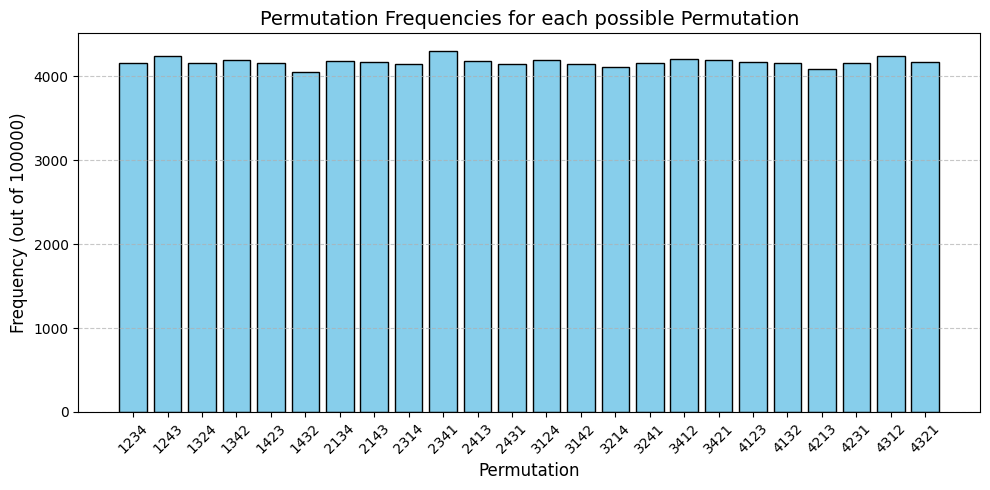

In [16]:
labels = [''.join(map(str, p)) for p in expected_perms]
frequencies = [counts_sort[p] for p in expected_perms]
x = range(len(labels))  

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x, frequencies, color='skyblue', edgecolor='black')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.title('Permutation Frequencies for each possible Permutation', fontsize=14)
plt.xlabel('Permutation', fontsize=12)
plt.ylabel(f'Frequency (out of {trials})', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

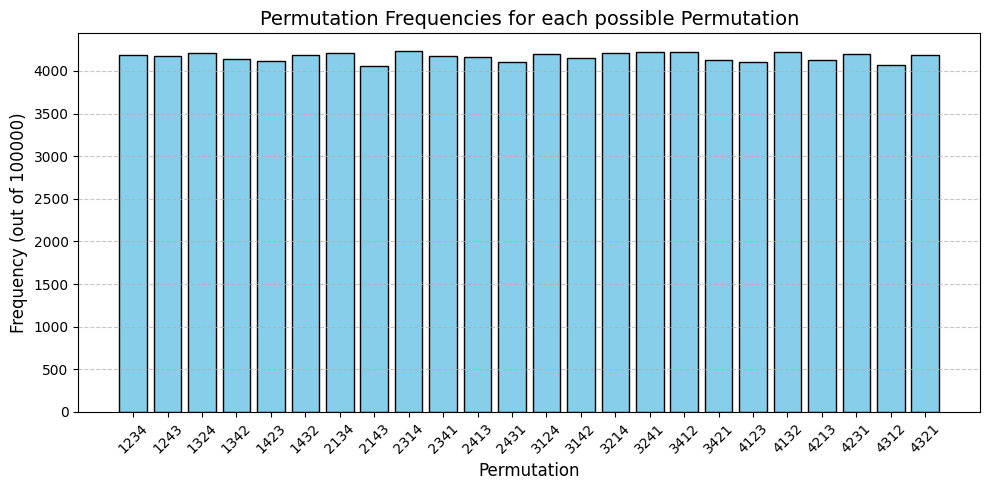

In [19]:
frequencies = [counts_swap[p] for p in expected_perms]

# Plot
plt.figure(figsize=(10, 5))
plt.bar(x, frequencies, color='skyblue', edgecolor='black')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.title('Permutation Frequencies for each possible Permutation', fontsize=14)
plt.xlabel('Permutation', fontsize=12)
plt.ylabel(f'Frequency (out of {trials})', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()